In [1]:
%%capture
!pip install spikeinterface[full] ipympl remfile pynwb
import spikeinterface.full as si
%matplotlib widget

### Use simulated data for now

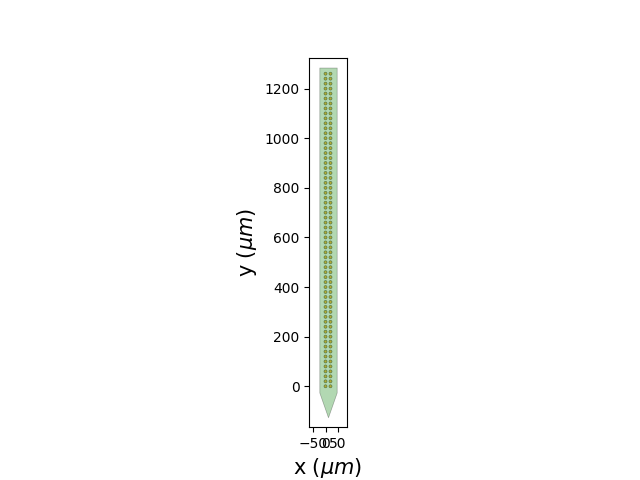

In [2]:
rec, sort = si.generate_ground_truth_recording(durations=[60], num_channels=128, num_units=50)
si.plot_probe_map(rec)

In [3]:
si.plot_traces(rec, backend="ipywidgets")

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

### Extract waveforms

Start with simulated data

In [4]:
we = si.extract_waveforms(rec, sort, folder=None, mode="memory", n_jobs=-1)

extract waveforms shared_memory multi buffer:   0%|          | 0/60 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/60 [00:00<?, ?it/s]

### Get spike scalings

In [5]:
amp_scalings = si.compute_amplitude_scalings(we)

extract amplitude scalings:   0%|          | 0/60 [00:00<?, ?it/s]

## Get residuals

In [6]:
all_templates = we.get_all_templates()
residuals_w_scaling = si.InjectTemplatesRecording(
    sorting=sort,
    templates=-all_templates,
    amplitude_factor=amp_scalings,
    parent_recording=rec
)
residuals_wout_scaling = si.InjectTemplatesRecording(
    sorting=sort,
    templates=-all_templates,
    amplitude_factor=None,
    parent_recording=rec
)
rec_dict = dict(
    original=rec,
    residuals_w=residuals_w_scaling,
    residuals_wout=residuals_wout_scaling
)

In [7]:
rec_dict = dict(
    original=rec,
    residuals_w=residuals_w_scaling,
    residuals_wout=residuals_wout_scaling
)

In [8]:
si.plot_traces(rec_dict, backend="ipywidgets")

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

# Stream NWB

### Load IBL recording

In [9]:
rec_ibl = si.read_nwb_recording(
    file_path="https://api.dandiarchive.org/api/assets/b2fee6b4-6049-4720-8d3d-44f8ec483527/download/",
    stream_mode="remfile",
    electrical_series_path="acquisition/ElectricalSeriesAp00"
)

In [10]:
rec_f = si.highpass_filter(rec_ibl)
rec_de = si.highpass_spatial_filter(rec_f)
rec_cmr = si.common_reference(rec_f)

In [11]:
rec_dict = dict(
    raw=rec_ibl,
    hp=rec_f,
    destripe=rec_de,
    cmr=rec_cmr
)

In [12]:
si.plot_traces(rec_dict, backend="ipywidgets")

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

### Save 10 s data

In [13]:
rec_ibl_cut = rec_ibl.frame_slice(0, int(10 * rec_ibl.sampling_frequency))

In [15]:
rec_ibl_saved = rec_ibl_cut.save(folder="ibl_snippet_10", n_jobs=-1)

write_binary_recording with n_jobs = 16 and chunk_size = 30000


write_binary_recording:   0%|          | 0/10 [00:00<?, ?it/s]

In [16]:
rec_f = si.highpass_filter(rec_ibl_cut)
rec_de = si.highpass_spatial_filter(rec_f)
rec_cmr = si.common_reference(rec_f)